In [1]:

import os

import matplotlib.pyplot as plt
%matplotlib inline

import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/home/gabrijel/anaconda3/envs/machine-learning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def plot_history(history):
    history_data        = history.history

    train_accuracy      = history_data['acc']
    train_loss          = history_data['loss']
    validation_accuracy = history_data['val_acc']
    validation_loss     = history_data['val_loss']

    epochs              = range(1, len(history_data['acc']) + 1)

    f, (left, right) = plt.subplots(1, 2)
    f.set_size_inches(16,4)

    left.plot(epochs, train_loss, 'bo', label='Training loss')
    left.plot(epochs, validation_loss, 'b', label='Validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Loss')
    left.legend()

    right.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
    right.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
    right.set_title('Training and validation accuracy')
    right.set_xlabel('Epochs')
    right.set_ylabel('Accuracy')
    right.legend()
    
    plt.show()

def plot_accuracy_history(originalModelHistory, otherModelHistory):

    original_validation_loss = originalModelHistory.history['val_loss']
    other_validation_loss    = otherModelHistory.history['val_loss']
    epochs                   = range(1, len(original_validation_loss) + 1)

    f, left = plt.subplots(1, 1)
    f.set_size_inches(12,4)

    left.plot(epochs, original_validation_loss, 'bo', label='Original model validation loss')
    left.plot(epochs, other_validation_loss, 'b', label='Other model validation loss')
    left.set_title('Training and validation loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Validation loss')
    left.legend()

    plt.show()

In [3]:
train_generator, validation_generator, test_generator = ImageDataGenerator(rescale=1./255), ImageDataGenerator(rescale=1./255), ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/train'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/validation'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/test'),
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size= (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, kernel_size= (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, kernel_size= (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6922 - acc: 0.5305 - val_loss: 0.6784 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6638 - acc: 0.6060 - val_loss: 0.6691 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6275 - acc: 0.6525 - val_loss: 0.6702 - val_acc: 0.5720
Epoch 4/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5831 - acc: 0.6890 - val_loss: 0.6205 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 10s 97ms/step - loss: 0.5637 - acc: 0.7085 - val_loss: 0.6231 - val_acc: 0.6470
Epoch 6/30
100/100 [==============================] - 10s 98ms/step - loss: 0.5516 - acc: 0.7170 - val_loss: 0.5950 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 10s 98ms/step - loss: 0.5296 - acc: 0.7260 - val_loss: 0.5911 - val_acc: 0.6820oss: 0
Epoch 8/30
100/100 [==============================] - 1

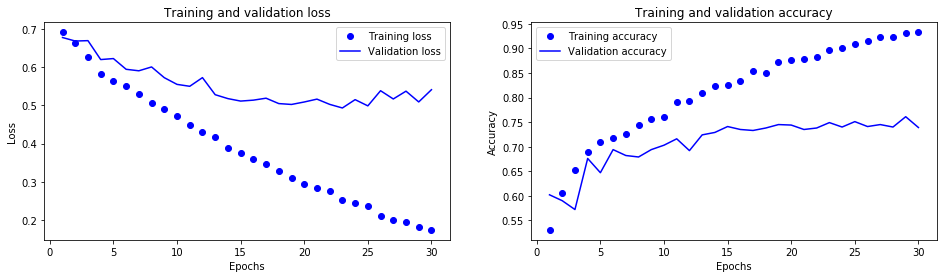

[0.52570628643035888, 0.76500000119209288]


In [7]:
plot_history(history)
print(model.evaluate_generator(test_generator))

According to charts above, it is clear that the model is overfitting. Possible solution is to augment available train data and retrain network with fewer epochs number.

In [7]:
augmentationGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator, validation_generator, test_generator = augmentationGenerator, ImageDataGenerator(rescale=1./255), ImageDataGenerator(rescale=1./255)

train_generator = train_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/train'),
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/validation'),
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_generator.flow_from_directory(
    directory = os.path.join(os.getcwd(), 'datasets/training/test'),
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 30s 296ms/step - loss: 0.6891 - acc: 0.5284 - val_loss: 0.6789 - val_acc: 0.5990
Epoch 2/30
100/100 [==============================] - 26s 260ms/step - loss: 0.6735 - acc: 0.5744 - val_loss: 0.6776 - val_acc: 0.5647
Epoch 3/30
100/100 [==============================] - 26s 259ms/step - loss: 0.6590 - acc: 0.5894 - val_loss: 0.6561 - val_acc: 0.5977
Epoch 4/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6363 - acc: 0.6234 - val_loss: 0.6423 - val_acc: 0.6180
Epoch 5/30
100/100 [==============================] - 26s 255ms/step - loss: 0.6217 - acc: 0.6581 - val_loss: 0.6348 - val_acc: 0.6288
Epoch 6/30
100/100 [==============================] - 28s 278ms/step - loss: 0.6040 - acc: 0.6697 - val_loss: 0.6376 - val_acc: 0.6117
Epoch 7/30
100/100 [==============================] - 26s 261ms/step - loss: 0.5911 - acc: 0.6847 - val_loss: 0.5953 - val_acc: 0.6992
Epoch 8/30
100/100 [==============================] - 2

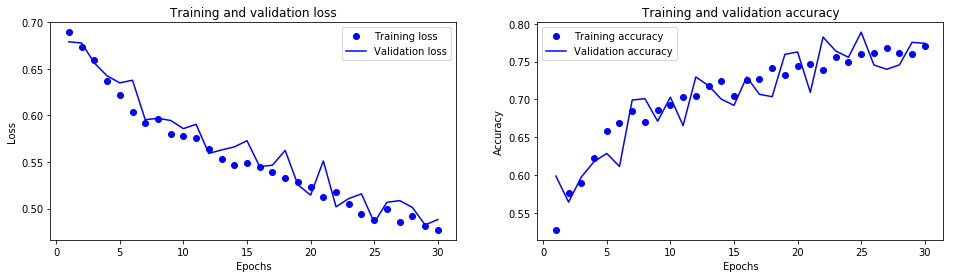

[0.52193916082382197, 0.753]


In [9]:
plot_history(history)
print(model.evaluate_generator(test_generator))

It looks like we solved the overfitting problem, but the truth is that network needs more training.

In [10]:
model.save('cnn-from-scratch.h5')